In [213]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
user_expectations = np.linspace(0.0, 10.0, 1000000) #x-axis
user_expectations

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [215]:
noise = np.random.randn(len(user_expectations))
noise

array([-0.57479362, -0.76666921, -0.39243128, ..., -0.69472992,
        0.47440772,  0.45250439])

In [216]:
QoE_real = -0.7 * user_expectations + 9 + noise #linear equation

In [217]:
df_expectations = pd.DataFrame(data=user_expectations, columns=['User Expectations'])
df_QoE = pd.DataFrame(data = QoE_real, columns=['QoE'])
df_data = pd.concat([df_expectations, df_QoE], axis=1)
df_data

,User Expectations,QoE
0,0.00000,8.425206
1,0.00001,8.233324
2,0.00002,8.607555
3,0.00003,10.138508
4,0.00004,8.730767
5,0.00005,9.882240
6,0.00006,9.190740
7,0.00007,8.006512
8,0.00008,7.245735
9,0.00009,8.909117


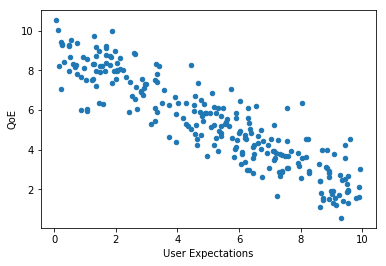

In [218]:
df_data.sample(n=250).plot(kind='scatter', x = 'User Expectations', y = 'QoE')

In [219]:
batch_size = 10

In [220]:
randoms = np.random.randn(2)
randoms

array([-0.81070881, -0.98630891])

In [221]:
m = tf.Variable(randoms[0], dtype=tf.float32)
k = tf.Variable(randoms[1], dtype=tf.float32)

In [222]:
placeholder_x = tf.placeholder(tf.float32, [batch_size])
placeholder_y = tf.placeholder(tf.float32, [batch_size])

In [223]:
operation_mx = tf.multiply(m, placeholder_x)

In [224]:
y_model = tf.add(operation_mx, k)

In [225]:
error = tf.reduce_sum(tf.square(placeholder_y-y_model)) #loss function

In [226]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [227]:
init = tf.global_variables_initializer()

In [228]:
with tf.Session() as sess:
    sess.run(init)
    num_batches = 10000
    
    for i in range(num_batches):
        rand_index = np.random.randint(len(user_expectations), size=batch_size)
        feed_dict = {placeholder_x:user_expectations[rand_index], placeholder_y:QoE_real[rand_index]}
        
        sess.run(train, feed_dict=feed_dict)
        
    model_m, model_k = sess.run([m, k])

In [229]:
model_m

-0.66335344

In [230]:
model_k

8.988731

In [231]:
QoE_result = user_expectations * model_m + model_k

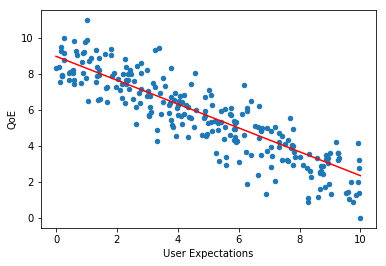

In [234]:
df_data.sample(n=250).plot(kind='scatter', x = 'User Expectations', y = 'QoE')
plt.plot(user_expectations,QoE_result,'r')